### OCI Data Science - Useful Tips
Everything stored in the <span style="background-color: #d5d8dc ">/home/datascience</span> folder is now stored on your block volume drive. The <span style="background-color: #d5d8dc ">ads-examples</span> folder has moved outside of your working space. Notebook examples are now accessible through a Launcher tab "Notebook Examples" button.
<details>
<summary><font size="2">1. Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">2. OCI Configuration and Key Files Set Up</font></summary><p>Follow the instructions in the getting-started notebook. That notebook is accessible via the "Getting Started" Launcher tab button.</p>
</details>
<details>
<summary><font size="2">3. Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">4. Typical Cell Imports and Settings</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import MLData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">5. Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [7]:
faccount=pd.read_csv("faccount2.csv")

In [9]:
faccount.head(10)

,ACCTID,ACCTTYPE,ACCTNAME,FIRSTNAME,SURNAME,DOB,ACCTCREATED,ACCTRISK,ADDRESS,ADDRESS_LAT,ADDRESS_LON,CATEGORY
0,800039,BUSINESS,Young Supermarket,Kevin,Young,23/02/1982 00:00,20/09/2018 00:00,MEDIUM,BRISBANE,-27.512179,153.073105,Supermarket
1,800040,BUSINESS,Williams Grocery,Lindsay,Williams,20/02/1959 00:00,24/02/2018 00:00,MEDIUM,BRISBANE,-27.504303,153.073470,Grocery
2,800041,CREDIT,Myers Supermarket,Lisa,Myers,04/09/1982 00:00,11/01/2018 00:00,HIGH,BRISBANE,-27.484970,153.097588,Supermarket
3,800042,BUSINESS,Martinez Supermarket,Brittany,Martinez,11/10/1976 00:00,04/12/2018 00:00,MEDIUM,BRISBANE,-27.402357,153.056983,Supermarket
4,800043,CREDIT,Taylor Grocery,David,Taylor,23/01/1978 00:00,15/07/2019 00:00,MEDIUM,BRISBANE,-27.473628,152.955089,Grocery
5,800044,CREDIT,Orr Grocery,Adrian,Orr,04/09/1968 00:00,11/12/2016 00:00,LOW,BRISBANE,-27.462055,153.007911,Grocery
6,800045,CREDIT,Anderson Grocery,Raymond,Anderson,21/03/1980 00:00,12/02/2018 00:00,LOW,BRISBANE,-27.402610,153.003706,Grocery
7,800046,CREDIT,Berg Grocery,Jennifer,Berg,06/07/1986 00:00,30/05/2018 00:00,LOW,BRISBANE,-27.449499,153.014107,Grocery
8,800047,CREDIT,Hatfield Supermarket,Jocelyn,Hatfield,06/06/1986 00:00,06/01/2019 00:00,MEDIUM,BRISBANE,-27.535465,153.068066,Supermarket
9,800048,BUSINESS,Patterson Supermarket,Samantha,Patterson,08/09/1968 00:00,28/12/2018 00:00,LOW,BRISBANE,-27.453874,153.039968,Supermarket


In [10]:
ftxn=pd.read_csv("ftxn3.csv")

In [12]:
ftxn.head(10)

,TXN_ID,TXTYPE,AMOUNT,FROMACCTID,TOACCTID,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED
0,9.500610e+11,\tPAYMENT,320,500607,800242,22/01/2020 17:00,\tDinner with Shane,\tN,\t\tY
1,9.500610e+11,\tPAYMENT,48,500607,800111,23/01/2020 08:00,\tBreakfast with Steven,\tN,\t\tY
2,9.500610e+11,\tTRANSFER,6209,500607,500929,23/01/2020 13:00,\tHoliday Cost,\t\tN,\t\tY
3,9.500610e+11,\tPAYMENT,66,500607,800252,23/01/2020 17:00,Meal with Mary,N,Y
4,9.500610e+11,\tPAYMENT,47,500607,800116,24/01/2020 08:00,Coffee with Brian,N,Y
5,9.500610e+11,\tTRANSFER,4855,500607,500453,24/01/2020 13:00,Water Costs,N,Y
6,9.500610e+11,\tPAYMENT,92,500607,800201,24/01/2020 17:00,Dinner with Monica,N,Y
7,9.500610e+11,\tPAYMENT,61,500607,800185,25/01/2020 08:00,Breakfast with Renee,N,Y
8,9.500610e+11,\tTRANSFER,8199,500607,500892,25/01/2020 13:00,Subscription Costs,N,Y
9,9.500610e+11,\tPAYMENT,145,500607,800250,25/01/2020 17:00,Dinner with Lisa,N,Y


In [13]:
faccount.columns

Index(['ACCTID', 'ACCTTYPE', 'ACCTNAME', 'FIRSTNAME', 'SURNAME', 'DOB',
       'ACCTCREATED', 'ACCTRISK', 'ADDRESS', 'ADDRESS_LAT', 'ADDRESS_LON',
       'CATEGORY'],
      dtype='object')

In [14]:
ftxn.columns

Index(['TXN_ID', '\t\tTXTYPE', '\t\tAMOUNT', '\tFROMACCTID', '\tTOACCTID',
       '\tTXDATE', '\t\t\tREFERENCE', '\t\tISFRAUD', '\tISFLAGGED'],
      dtype='object')

In [15]:
faccount.nunique(axis = 0, dropna = True)

ACCTID         2000
ACCTTYPE          4
ACCTNAME       1969
FIRSTNAME       477
SURNAME         685
DOB            1853
ACCTCREATED    1258
ACCTRISK          3
ADDRESS           1
ADDRESS_LAT    1798
ADDRESS_LON    1798
CATEGORY         47
dtype: int64

In [16]:
ftxn.nunique(axis = 0, dropna = True)

TXN_ID               141
\t\tTXTYPE             4
\t\tAMOUNT         10029
\tFROMACCTID        1283
\tTOACCTID          1615
\tTXDATE            1098
\t\t\tREFERENCE     2771
\t\tISFRAUD            3
\tISFLAGGED            2
dtype: int64

In [17]:
faccount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
ACCTID         2000 non-null int64
ACCTTYPE       2000 non-null object
ACCTNAME       2000 non-null object
FIRSTNAME      2000 non-null object
SURNAME        2000 non-null object
DOB            2000 non-null object
ACCTCREATED    2000 non-null object
ACCTRISK       2000 non-null object
ADDRESS        2000 non-null object
ADDRESS_LAT    2000 non-null float64
ADDRESS_LON    2000 non-null float64
CATEGORY       2000 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 187.6+ KB


In [18]:
ftxn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
TXN_ID          1048575 non-null float64
		TXTYPE        1048575 non-null object
		AMOUNT        1048575 non-null int64
	FROMACCTID     1048575 non-null int64
	TOACCTID       1048575 non-null int64
	TXDATE         1048575 non-null object
			REFERENCE    1048575 non-null object
		ISFRAUD       1048575 non-null object
	ISFLAGGED      1048575 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 72.0+ MB


In [27]:
pd.get_dummies(faccount.ACCTRISK, prefix='RISK')

,RISK_HIGH,RISK_LOW,RISK_MEDIUM
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,0,1
9,0,1,0


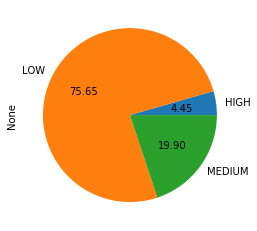

In [67]:
pie = faccount.groupby('ACCTRISK').size().plot(kind='pie', autopct='%.2f')

In [92]:
account_dup

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1970    False
1971    False
1972    False
1973    False
1974    False
1975    False
1976    False
1977    False
1978    False
1979    False
1980    False
1981    False
1982    False
1983    False
1984    False
1985    False
1986    False
1987    False
1988    False
1989    False
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
Name: ACCTID, Length: 2000, dtype: bool